In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

%matplotlib inline
print("setup complete")

setup complete


In [ ]:
df = pd.read_csv('/content/epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [ ]:
sts.linregress(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])
slope = sts.linregress(x=df['Year'], y=df['CSIRO Adjusted Sea Level']).slope
intercept = sts.linregress(x=df['Year'], y=df['CSIRO Adjusted Sea Level']).intercept

In [ ]:
#for first line of best fit upto 2050 year for prediction
x_pred = pd.Series([ i for i in range(1880,2051)])
#Y=mx+c for liner regession
y_pred = (slope * x_pred) + intercept

In [ ]:
#2nd best fit line for data from 2000 till 2050 prediction
new_df = df.loc[df['Year'] >= 2000]
sts.linregress(x=new_df['Year'], y=new_df['CSIRO Adjusted Sea Level'])
slope_2000 = sts.linregress(x=new_df['Year'], y=new_df['CSIRO Adjusted Sea Level']).slope
intercept_2000 = sts.linregress(x=new_df['Year'], y=new_df['CSIRO Adjusted Sea Level']).intercept
#set x and y value for prediction after 2000 till 2050
x_pred20 = pd.Series([i for i in range(2000, 2051)])
y_pred20 = (slope_2000*x_pred20) + intercept_2000

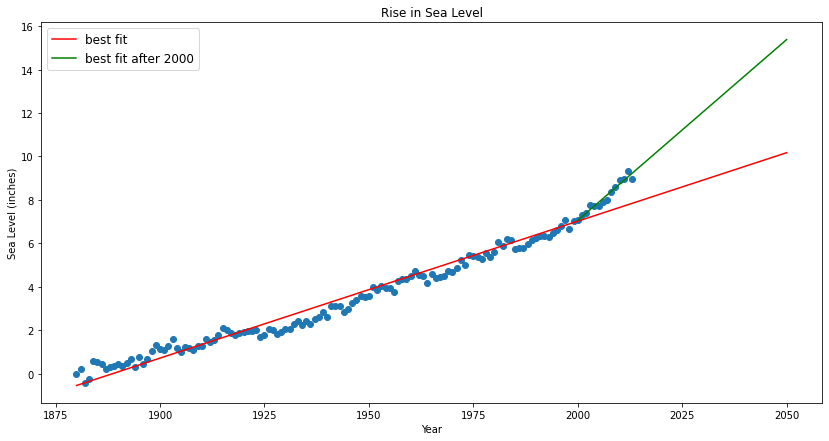

In [ ]:
fig, ax = plt.subplots(figsize=(14,7))
plt.scatter(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])
#first best fit line
plt.plot(x_pred,y_pred, color='red', label='best fit')
#second best fit line
plt.plot(x_pred20,y_pred20, color='green', label='best fit after 2000')

ax.set_title('Rise in Sea Level')
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.legend(fontsize=12)